# Japanese demographics

In [1]:
import os

APP_ID = os.environ['APP_ID']
LANG = 'J'
BASE_URL = 'https://api.e-stat.go.jp/rest/3.0/app/json/getStatsData?appId={id}&lang={lang}'.format(id=APP_ID,
                                                                                                    lang=LANG)

In [2]:
import requests
import pandas
from datetime import datetime

json = requests.get('{url}&statsDataId=0003411561'.format(url=BASE_URL)).json()
stats = json['GET_STATS_DATA']['STATISTICAL_DATA']
labels = stats['CLASS_INF']['CLASS_OBJ']
labelMap = {label['@id']: {l['@code']: l['@name'] for l in label['CLASS']} for label in labels}
data = stats['DATA_INF']['VALUE']
for d in data:
    d['@cat01'] = labelMap['cat01'][d['@cat01']]
    d['@time'] = datetime.strptime(labelMap['time'][d['@time']], '%Y年')
df = pandas.DataFrame(data)
df = df.rename(columns={'@cat01': 'Type', '@time': 'Year', '@unit': 'Unit', '$': 'Value'})
df['Value'] = df['Value'].apply(pandas.to_numeric, errors='coerce')
df

,Type,Year,Unit,Value
0,出生数,2021-01-01,人,811622.00
1,出生数,2020-01-01,人,840835.00
2,出生数,2019-01-01,人,865239.00
3,出生数,2018-01-01,人,918400.00
4,出生数,2017-01-01,人,946146.00
...,...,...,...,...
3235,離婚率,1903-01-01,人口千対,1.44
3236,離婚率,1902-01-01,人口千対,1.43
3237,離婚率,1901-01-01,人口千対,1.43
3238,離婚率,1900-01-01,人口千対,1.46


In [3]:
df['Type'].drop_duplicates()

0              出生数
120            死亡数
240          乳児死亡数
360         新生児死亡数
480          自然増減数
600            死産数
720          自然死産数
840          人工死産数
960         周産期死亡数
1080    満22週以後の死産数
1200       早期新生児死亡
1320          婚姻件数
1440          離婚件数
1560           出生率
1680       合計特殊出生率
1800           死亡率
1920         乳児死亡率
2040        新生児死亡率
2160         自然増減率
2280           死産率
2400         自然死産率
2520         人工死産率
2640        周産期死亡率
2760    満22週以後の死産率
2880      早期新生児死亡率
3000           婚姻率
3120           離婚率
Name: Type, dtype: object

In [4]:
births = df[df['Type'] == '出生数'].drop('Type', axis=1)
births

,Year,Unit,Value
0,2021-01-01,人,811622.0
1,2020-01-01,人,840835.0
2,2019-01-01,人,865239.0
3,2018-01-01,人,918400.0
4,2017-01-01,人,946146.0
...,...,...,...
115,1903-01-01,人,1489816.0
116,1902-01-01,人,1510835.0
117,1901-01-01,人,1501591.0
118,1900-01-01,人,1420534.0


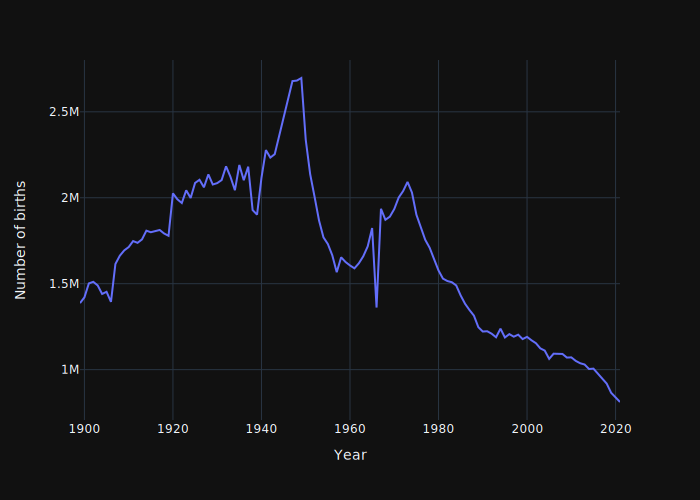

In [5]:
import plotly.express as px

fig = px.line(births, x='Year', y='Value', labels={'Value': 'Number of births'})
fig.show('svg')

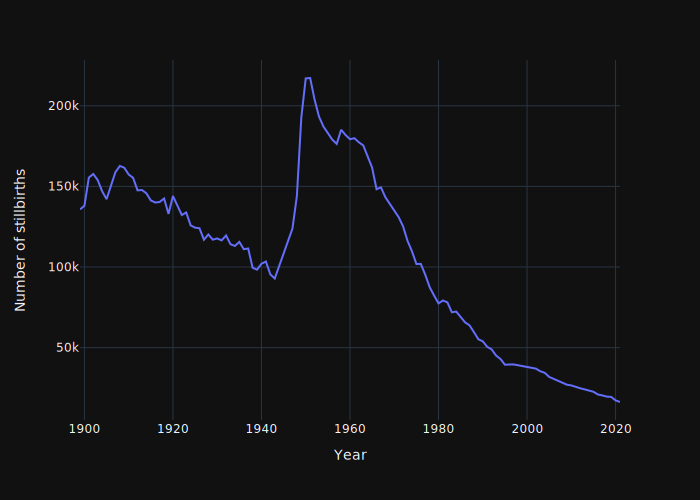

In [6]:
stillbirths = df[df['Type'] == '死産数'].drop('Type', axis=1)
fig = px.line(stillbirths, x='Year', y='Value', labels={'Value': 'Number of stillbirths'})
fig.show('svg')

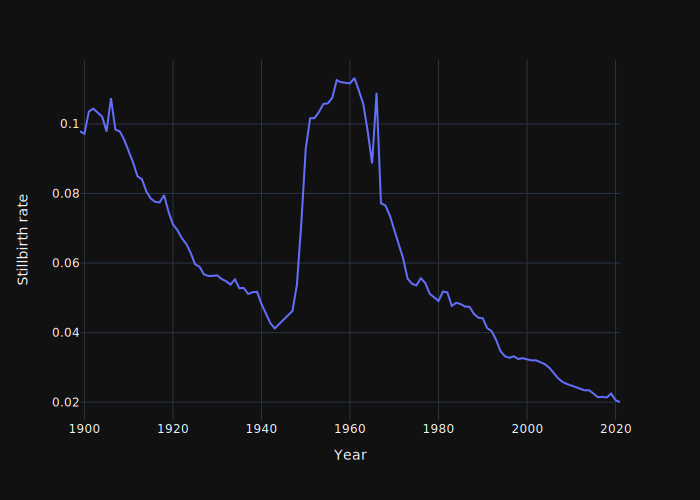

In [7]:
rate = pandas.DataFrame(stillbirths['Value'].reset_index(drop=True).div(births['Value'], axis=0))
rate['Year'] = births['Year']
fig = px.line(rate, x='Year', y='Value', labels={'Value': 'Stillbirth rate'})
fig.show('svg')

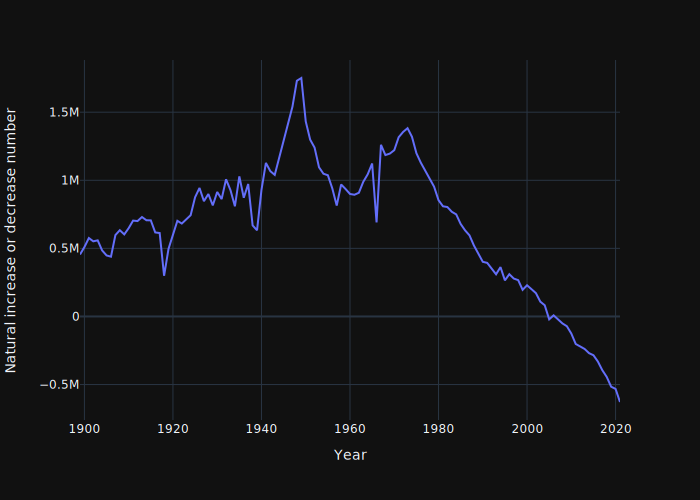

In [8]:
nid = df[df['Type'] == '自然増減数'].drop('Type', axis=1)
fig = px.line(nid, x='Year', y='Value', labels={'Value': 'Natural increase or decrease number'})
fig.show('svg')